In [1]:
#import modules
import pandas as pd
import numpy as np
import re

# Custom preprocessing function
from utils import preprocess_text


In [2]:
#read csv that includes stock data
transcribed_list= pd.read_csv('transcribed_transcript_list.csv')
transcribed_list.head(10)
print(transcribed_list['transcript'][0])

Apple Inc. (NASDAQ:AAPL) Q4 2020 Earnings Conference Call October 29, 2020  5:00 PM ET
Company Participants 
Tejas Gala - Senior Manager, Corporate Finance and Investor Relations
Tim Cook - Chief Executive Officer
Luca Maestri - Senior Vice President and Chief Financial Officer
Conference Call Participants
Shannon Cross - Cross Research
Jeriel Ong - Deutsche Bank
Katy Huberty - Morgan Stanley
Amit Daryanani - Evercore
Samik Chatterjee - JP Morgan
Krish Sankar - Cowen and Company
Kyle McNealy - Jefferies
Chris Caso - Raymond James
Operator
Good day everyone and welcome to the Apple Inc. Fourth Quarter Fiscal Year 2020 Earnings Conference Call. Today’s call is being recorded.
At this time for opening remarks and introductions, I would like to turn things over to Tejas Gala, Senior Analyst, Corporate Finance and Investor Relations. Please go ahead, sir.
Tejas Gala
Thank you. Good afternoon and thank you for joining us. Speaking first today is Apple’s CEO, Tim Cook, and he will be followed

In [3]:
#add column that includes the total character count for each earning call transcripts
transcribed_list['char_count']= transcribed_list['transcript'].str.len()
transcribed_list[['transcript', 'char_count']].head()

,transcript,char_count
0,Apple Inc. (NASDAQ:AAPL) Q4 2020 Earnings Conf...,49717
1,Apple Inc. (NASDAQ:AAPL) Q3 2020 Results Confe...,46305
2,Apple Inc. (NASDAQ:AAPL) Q2 2020 Results Confe...,46869
3,Apple Inc. (NASDAQ:AAPL) Q1 2020 Results Confe...,46419
4,AbbVie Inc. (NYSE:ABBV) Q3 2020 Results Earnin...,75442


In [4]:
# reference link-https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression
# function to remove punctuations
import re,string
#('[^\w\s]','')
def strip_links(text):
    link_regex    =  re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#',""]
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

In [5]:
#apply function above to transcript column
transcribed_list['no_punctuation']=transcribed_list['transcript'].map(lambda x:strip_all_entities(strip_links(x)))

print(transcribed_list['no_punctuation'][0:6])

0    Apple Inc NASDAQ AAPL Q4 2020 Earnings Confere...
1    Apple Inc NASDAQ AAPL Q3 2020 Results Conferen...
2    Apple Inc NASDAQ AAPL Q2 2020 Results Conferen...
3    Apple Inc NASDAQ AAPL Q1 2020 Results Conferen...
4    AbbVie Inc NYSE ABBV Q3 2020 Results Earnings ...
5    AbbVie Inc NYSE ABBV Q2 2020 Earnings Conferen...
Name: no_punctuation, dtype: object


In [6]:
#remove quotes and apostrophes
transcribed_list['no_punctuation']=transcribed_list['no_punctuation'].str.replace('[^\w\s]','')
print(transcribed_list['no_punctuation'][0:6])

0    Apple Inc NASDAQ AAPL Q4 2020 Earnings Confere...
1    Apple Inc NASDAQ AAPL Q3 2020 Results Conferen...
2    Apple Inc NASDAQ AAPL Q2 2020 Results Conferen...
3    Apple Inc NASDAQ AAPL Q1 2020 Results Conferen...
4    AbbVie Inc NYSE ABBV Q3 2020 Results Earnings ...
5    AbbVie Inc NYSE ABBV Q2 2020 Earnings Conferen...
Name: no_punctuation, dtype: object


In [7]:
#preprocess latest transcribed list with preprocess function in utils.py file

transcribed_list['preprocess_trans']= transcribed_list['no_punctuation'].apply(lambda x : ' '.join(preprocess_text(x, min_word_length=4)))
print(transcribed_list['preprocess_trans'][0:6])

0    apple nasdaq aapl earn conference call october...
1    apple nasdaq aapl result conference call july ...
2    apple nasdaq aapl result conference call april...
3    apple nasdaq aapl result conference call janua...
4    abbvie nyse abbv result earn conference call o...
5    abbvie nyse abbv earn conference call july com...
Name: preprocess_trans, dtype: object


In [8]:
# determining the words used infrequently @10% of the amount of transcripts
in_freq_words = pd.Series(' '.join(transcribed_list['preprocess_trans']).split()).value_counts()[-400:]
in_freq_words.head()

frothy      1
blincyto    1
shabu       1
hakim       1
spacious    1
dtype: int64

In [9]:
# Removing the infrequent words from the  transcript file
in_freq_words = list(in_freq_words.index)
transcribed_list['clean_trans'] = transcribed_list['preprocess_trans'].apply(lambda x: " ".join(x for x in x.split() if x not in in_freq_words))
transcribed_list['clean_trans'].head()

0    apple nasdaq aapl earn conference call october...
1    apple nasdaq aapl result conference call july ...
2    apple nasdaq aapl result conference call april...
3    apple nasdaq aapl result conference call janua...
4    abbvie nyse abbv result earn conference call o...
Name: clean_trans, dtype: object

In [10]:
transcribed_list.head()
print(transcribed_list.columns)

Index(['Unnamed: 0', 'date', 'ticker', 'title', 'transcript', 'url',
       'char_count', 'no_punctuation', 'preprocess_trans', 'clean_trans'],
      dtype='object')


In [11]:
# Remove the extra columns for working dataframe
transcribed_list_condensed= transcribed_list.drop(columns=['Unnamed: 0', 'url',
       'char_count', 'no_punctuation', 'preprocess_trans', 'transcript'], axis=1).sample(100)
# Print out the first rows of papers
transcribed_list_condensed.head()
print(transcribed_list_condensed.dtypes)

date           object
ticker         object
title          object
clean_trans    object
dtype: object


In [12]:
#review the output of column of transcripts that were processed
transcribed_list_condensed['clean_trans']

395    walmart nyse earn conference call august compa...
185    goldman sachs group nyse earn conference call ...
94     capital financial corporation nyse earn confer...
227    lilly company nyse earn conference call octobe...
99     costco wholesale corporation nasdaq cost earn ...
                             ...                        
109    cisco system nasdaq csco earn call august exec...
31     american tower corporation reit nyse earn conf...
89     comcast corporation nasdaq cmcsa earn conferen...
151    ford motor company nyse result earn conference...
354    thermo fisher scientific nyse earn conference ...
Name: clean_trans, Length: 100, dtype: object

In [13]:
transcribed_list_condensed=transcribed_list_condensed.rename(columns={'ticker': 'Symbol'})
transcribed_list_condensed.head(3)

,date,Symbol,title,clean_trans
395,8/18/2020,WMT,"Walmart, Inc. (WMT) CEO Doug McMillon on Q2 20...",walmart nyse earn conference call august compa...
185,7/15/2020,GS,"The Goldman Sachs Group, Inc. (GS) CEO David S...",goldman sachs group nyse earn conference call ...
94,1/21/2020,COF,Capital One Financial Corporation (COF) CEO Ri...,capital financial corporation nyse earn confer...


In [ ]:
#read detail csv for sector 
stock_detail= pd.read_csv('sandp100_more_detail_header.csv')
stock_detail.head(10)

In [ ]:
stock_word_detail_merge= pd.merge(transcribed_list_condensed, stock_detail, on='Symbol',  how='left')
stock_word_detail_merge.tail()
stock_word_detail_merge.columns

In [ ]:
stock_word_detail_mergeclean=stock_word_detail_merge.drop(['GICS_SubIndustry', 'Headquarters_Location', 'Date_first_added', 'CIK',
       'Founded'],1)
stock_word_detail_mergeclean.head(3)

In [ ]:
stock_word_detail_mergeclean2= stock_word_detail_mergeclean.rename(columns={'date':'call_date'})
stock_word_detail_mergeclean2.head(3)

In [ ]:
stock_word_detail_mergeclean2=stock_word_detail_mergeclean2[['Symbol', 'Name', 'GICS_Sector','call_date', 'title', 'clean_trans']]
stock_word_detail_mergeclean2.head(3)

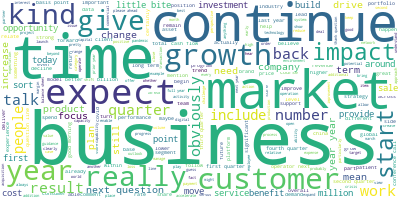

In [14]:
# Import the wordcloud library
from wordcloud import WordCloud

# Assign variable to condensed column
#trans_string = string(list(transcribed_list_condensed['clean_trans'].values))
trans_string = ','.join(list(stock_word_detail_mergeclean2['clean_trans'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='blue')

# Generate a word cloud
wordcloud.generate(trans_string)

# Visualize the word cloud
wordcloud.to_image()

In [15]:
#reference code https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
#Gensim is a NLP library used for unsupervised topic modeling which can handle large text collections.
import gensim
from gensim.utils import simple_preprocess
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = transcribed_list_condensed.clean_trans.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['jpmorgan', 'chase', 'nyse', 'result', 'conference', 'call', 'april', 'company', 'participant', 'jamie', 'dimon', 'chairman', 'jennifer', 'piepszak', 'conference', 'call', 'participant', 'erika', 'najarian', 'bank', 'america', 'mike', 'mayo', 'fargo', 'steven', 'chubak', 'wolfe', 'research', 'saul', 'martinez']


In [16]:
#Dictionary that encapsulates the mapping between normalized words and their integer ids.
import gensim.corpora as corpora
# Create Dictionary
id_pair_withword = corpora.Dictionary(data_words)
# Create Corpus set of documents to train the model
texts = data_words
# Determine the list of word frequency in the document 
corpus = [id_pair_withword.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 5), (1, 2), (2, 2), (3, 2), (4, 2), (5, 3), (6, 2), (7, 1), (8, 2), (9, 3), (10, 1), (11, 12), (12, 1), (13, 1), (14, 12), (15, 2), (16, 5), (17, 3), (18, 2), (19, 3), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 11), (26, 3), (27, 1), (28, 2), (29, 2)]


In [17]:
from pprint import pprint
# number of topics
num_topics = 25
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id_pair_withword,
                                       num_topics=num_topics)
# Print the Keyword in the 25 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(16,
  '0.012*"quarter" + 0.012*"year" + 0.006*"continue" + 0.006*"question" + '
  '0.006*"growth" + 0.006*"revenue" + 0.005*"market" + 0.005*"business" + '
  '0.005*"thank" + 0.005*"million"'),
 (12,
  '0.014*"year" + 0.011*"quarter" + 0.008*"continue" + 0.008*"thank" + '
  '0.007*"growth" + 0.006*"business" + 0.006*"time" + 0.006*"market" + '
  '0.005*"good" + 0.005*"point"'),
 (23,
  '0.012*"year" + 0.009*"quarter" + 0.008*"thank" + 0.008*"business" + '
  '0.007*"question" + 0.007*"continue" + 0.006*"time" + 0.006*"first" + '
  '0.006*"term" + 0.005*"market"'),
 (21,
  '0.016*"year" + 0.012*"quarter" + 0.010*"business" + 0.008*"continue" + '
  '0.007*"growth" + 0.007*"billion" + 0.007*"question" + 0.007*"thank" + '
  '0.006*"revenue" + 0.006*"market"'),
 (6,
  '0.015*"year" + 0.010*"quarter" + 0.008*"question" + 0.008*"growth" + '
  '0.008*"thank" + 0.007*"continue" + 0.007*"business" + 0.006*"time" + '
  '0.006*"first" + 0.005*"revenue"'),
 (8,
  '0.017*"year" + 0.008*"quarter" + 

In [18]:
import pickle

with open('LDA_full_trans_model.pkl','wb') as f:
    pickle.dump(lda_model, f)

In [19]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os

# Visualize the 25 topics defined above
pyLDAvis.enable_notebook()

#load the model file
LDAvis_filepath = os.path.join('LDA_full_trans_model.pkl'+str(num_topics))
#run model
if 1 == 1:
    LDAvis_prep = pyLDAvis.gensim.prepare(lda_model, corpus, id_pair_withword)
    with open(LDAvis_filepath, 'wb') as f:
        pickle.dump(LDAvis_prep, f)
        
# load pre-prepared pyLDAvis data from disk
with open(LDAvis_filepath, 'rb') as f:
    LDAvis_prep = pickle.load(f)

#save to html file
pyLDAvis.save_html(LDAvis_prep, 'LDA_full_trans_model.pkl'+ str(num_topics) +'.html')
#display model
LDAvis_prep

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.001470  0.002094       1        1  19.951571
2      0.004487 -0.004361       2        1  17.534304
21     0.003074  0.001898       3        1  12.190940
7      0.002711  0.004155       4        1   9.345907
1      0.001061  0.001917       5        1   8.278955
5      0.000961 -0.000186       6        1   7.434510
9     -0.001632 -0.000258       7        1   5.033309
19     0.003000 -0.000217       8        1   4.652796
15    -0.005891 -0.001158       9        1   3.675734
22     0.001359 -0.000663      10        1   1.869191
4     -0.001415 -0.002243      11        1   1.412913
8     -0.000207 -0.005620      12        1   1.403373
11     0.001291 -0.001006      13        1   1.365824
10     0.000111  0.000286      14        1   1.322875
12    -0.000018  0.001580      15        1   1.067738
14    -0.000492 -0.000910      16        1   0.823973
13    -0.001929  0.003161      17        1   0.687802
20    -0.000940 -0.002259      18        1   0.678949
6      0.001116 -0.001867      19        1   0.508216
23    -0.000158  0.000722      20        1   0.373346
0      0.001703  0.001698      21        1   0.149293
24    -0.002372  0.000375      22        1   0.118496
18    -0.000085  0.002551      23        1   0.090180
17    -0.002091 -0.001877      24        1   0.028889
16    -0.005112  0.002189      25        1   0.000919, topic_info=          Term         Freq        Total Category  logprob  loglift
1056      year  6217.000000  6217.000000  Default  30.0000  30.0000
755    quarter  5233.000000  5233.000000  Default  29.0000  29.0000
123   business  3716.000000  3716.000000  Default  28.0000  28.0000
204   continue  3111.000000  3111.000000  Default  27.0000  27.0000
756   question  3227.000000  3227.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
952      thank     0.018530  3233.968506  Topic25  -5.3851  -0.4728
964       time     0.015563  2225.677002  Topic25  -5.5596  -0.2737
285      drive     0.012721  1505.403198  Topic25  -5.7613  -0.0843
461     impact     0.013377  2068.395996  Topic25  -5.7110  -0.3517
411       give     0.012944  1789.263916  Topic25  -5.7439  -0.2397

[2212 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
6675      1  0.196333  abbvie
6675      2  0.084143  abbvie
6675      3  0.140238  abbvie
6675      4  0.056095  abbvie
6675      5  0.112190  abbvie
...     ...       ...     ...
1058     15  0.011034    zero
1058     16  0.011034    zero
1058     17  0.011034    zero
1058     18  0.011034    zero
1058     19  0.011034    zero

[9766 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 22, 8, 2, 6, 10, 20, 16, 23, 5, 9, 12, 11, 13, 15, 14, 21, 7, 24, 1, 25, 19, 18, 17])

In [20]:
#save py LDA model
with open('LDAvis_prep_full_trans.pkl','wb') as f:
    pickle.dump(LDAvis_prep, f)